# 1.单变量线性回归

## 1.1读取数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

In [2]:
filePath_1 = "ex1data1.txt"
filePath_2 = "ex1data2.txt"

In [3]:
data1 = pd.read_csv(filePath_1,header=None,names=["Population","Profit"])
data1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
#展示数据集的各种属性
data1.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


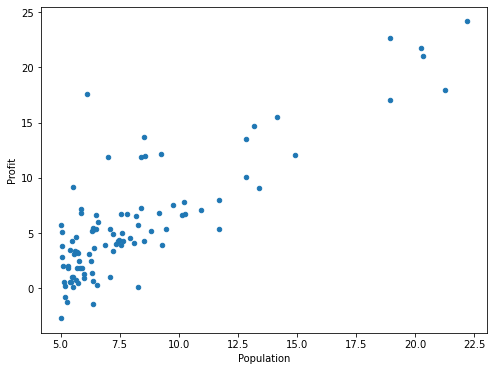

In [5]:
#绘制原始数据散点图
data1.plot(kind='scatter',x='Population',y='Profit',figsize=(8,6))
plt.show()

## 1.2对变量进行初始化

1.构造X矩阵，$m行\times2列$，$ (x^i_0,x^i_1)$

2.创建参数矩阵$\Theta$，$\Theta=(\theta_0,\theta_1)^T$

3.构造Y矩阵，$Y=(y_0,y_1,...,y_n)$

In [6]:
cols = data1.shape[1] #data的列数
X = data1.iloc[:,0:cols-1] #取除最后一列之外的全部数据
Y = data1.iloc[:,cols-1] #取最后一列的数据

In [7]:
X.head() #观察X的前五行

,Population
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598


In [8]:
Y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

代价函数应该是numpy.matrix，所以需要转换X，Y

In [9]:
X = np.matrix(X.values)
Z = np.ones((X.shape[0],1)) #准备一个列数与X相同的全为1的矩阵Z
X = np.hstack((Z,X)) #Z与X合并
Y = np.matrix(Y.values)
Theta = np.matrix(np.array([0,0]))

In [10]:
#观察X，Y，Theta矩阵的形状
print(type(X),X.dtype,X.shape)
print(type(Y),Y.dtype,Y.shape)
print(type(Theta),Theta.dtype,Theta.shape)

<class 'numpy.matrix'> float64 (97, 2)
<class 'numpy.matrix'> float64 (1, 97)
<class 'numpy.matrix'> int64 (1, 2)


## 1.3设计代价函数
<center>
$h_{\theta}(x^{(i)})=$ $x^i_1{\theta_0}+x^i_2{\theta_1}$
    </center>
<center>
J=$\frac{1}{2M}$$\displaystyle \sum^{M}_{i=1}$$(h_{\theta}(x^{(i)})-y_i)^2$
</center>
M：样本数

In [11]:
def computeCost(X,Y,Theta):
    inner=np.power(((X*Theta.T)-Y.T),2) #inner是一个M行1列的矩阵
    return np.sum(inner)/(2*len(X))

In [12]:
computeCost(X,Y,Theta)

32.072733877455676

## 1.4设计批量梯度下降算法
<center>
    $\theta_j:=\theta_j-\alpha{\frac{\partial}{\partial\theta_j}}J(\theta)$
    </center>
    
<center>
    ${\frac{\partial}{\partial\theta_j}}={\frac{1}{M}}{\displaystyle \sum^{M}_{i=1}}({h_\theta(x^{(i)})-y_i})x_i$
    </center>

In [13]:
#alpha:学习速率 iters:学习次数
def gradientDescent(X,Y,Theta,alpha,iters):
    #创建一个与Theta形状相同的临时矩阵，同步更新参数时，用于存放每次迭代的数据
    temp=np.matrix(np.zeros(Theta.shape)) 
    parametersNum=int(Theta.ravel().shape[1]) #Theta中元素(参数)个数
    cost=np.zeros(iters) #用于存储每次参数迭代后的误差
    
    for i in range(iters):
        error=(X*Theta.T)-Y.T #error:M行1列
        
        for j in range(parametersNum):
            mul=np.multiply(error,X[:,j])
            temp[0,j]=Theta[0,j]-alpha*np.sum(mul)/len(mul)
        
        Theta=temp #同步更新
        cost[i]=computeCost(X,Y,Theta)
    return Theta,cost
            

In [14]:
#训练结果
Theta_test,cost=gradientDescent(X,Y,Theta,0.01,1000)

In [15]:
Theta_test

matrix([[-3.24140214,  1.1272942 ]])

**绘制线性回归的拟合效果图**

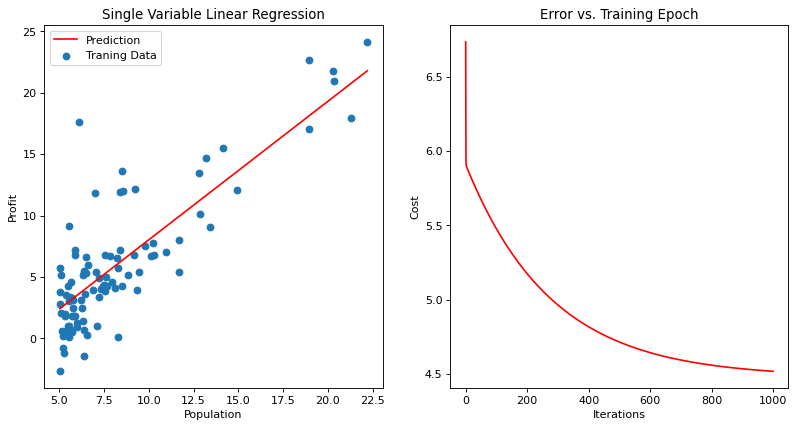

In [16]:
x=np.linspace(data1.Population.min(),data1.Population.max(),100)
y=Theta_test[0,0]*1+Theta_test[0,1]*x

plt.figure(figsize=(12,6),dpi=80)
plt.subplot(1,2,1)
plt.plot(x,y,'r',label='Prediction')
plt.scatter(data1.Population,data1.Profit,label='Traning Data')
plt.legend(loc=2)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Single Variable Linear Regression')

plt.subplot(1,2,2)

plt.plot(np.arange(1000),cost,'r')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs. Training Epoch')
plt.show()

# 2.多变量线性回归

## 2.1读取数据

In [17]:
data2=pd.read_csv(filePath_2,header=None,names=['Size','Bedrooms','Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [18]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


## 2.2特征归一化

In [19]:
#归一化数据=(数据-均值)/方差
data2=(data2-data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## 2.3数据预处理

In [20]:
cols=data2.shape[1]
X2=data2.iloc[:,0:cols-1]
Y2=data2.iloc[:,cols-1]

X2=np.hstack((np.ones((X2.shape[0],1)),np.matrix(X2.values))) 
Y2=np.matrix(Y2.values)
Theta2=np.matrix(np.array([0,0,0]))

In [21]:
#训练结果
Theta2_test,cost2=gradientDescent(X2,Y2,Theta2,0.01,1000)

In [22]:
Theta2_test

matrix([[-1.10957343e-16,  8.78503652e-01, -4.69166570e-02]])

**绘制线性回归的拟合效果**

Text(0.5, 1.0, 'Error vs. Training Epoch')

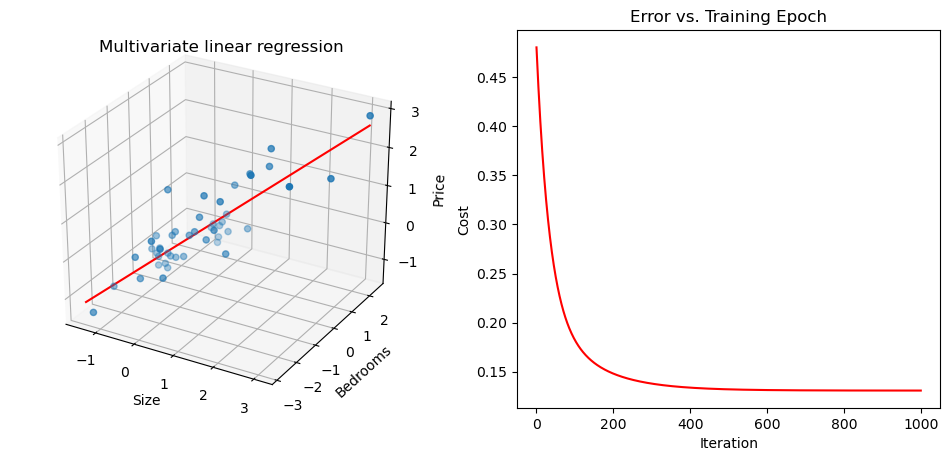

In [23]:
fig=plt.figure(figsize=(12,5),dpi=100)

ax=fig.add_subplot(121,projection='3d')
xline=np.linspace(data2.Size.min(),data2.Size.max(),100)
yline=np.linspace(data2.Bedrooms.min(),data2.Bedrooms.max(),100)
zline=Theta2_test[0,0]*1+Theta2_test[0,1]*xline+Theta2_test[0,2]*yline
ax.plot3D(xline,yline,zline,'red')

ax.scatter3D(data2.Size,data2.Bedrooms,data2.Price,cmap='Green')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Multivariate linear regression')

ax=fig.add_subplot(1,2,2)
ax.plot(np.arange(1000),cost2,'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## 3.正规方程

<center>
$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$
    </center>
<center>
    $=>\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$
    </center>

In [24]:
def normalEqn(X,Y):
    theta = np.linalg.inv(X.T@X)@X.T@Y.T
    return theta

In [25]:
theta_test = normalEqn(X,Y)
theta_test

matrix([[-3.89578088],
        [ 1.19303364]])

In [26]:
#梯度下降得到的结果是 matrix([[-3.24140214,  1.1272942 ]]),并不一致